<h1>Features of Stock Data</h1>

In [1]:
pip install TA-Lib

Note: you may need to restart the kernel to use updated packages.


In [27]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [28]:
import pandas as pd

In [29]:
stock = pd.read_csv("AppleCompanyStock.csv")

In [30]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    950 non-null    int64  
 1   month   950 non-null    int64  
 2   open    950 non-null    float64
 3   high    950 non-null    float64
 4   low     950 non-null    float64
 5   close   950 non-null    float64
 6   volume  950 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 52.1 KB


In [31]:
stock.head()

,year,month,open,high,low,close,volume
0,2018,3,177.32,177.470,173.66,175.82,46812368
1,2018,3,180.29,183.500,177.62,178.02,151720299
2,2018,3,175.21,180.000,174.27,179.98,138442235
3,2018,3,176.35,180.615,172.45,176.21,196432091
4,2018,2,172.05,175.650,171.01,175.50,133197874


In [32]:
stock.tail()

,year,month,open,high,low,close,volume
945,2000,2,108.00,117.12,105.94,108.75,14859900
946,2000,2,101.00,110.00,94.50,108.00,21289500
947,2000,1,108.44,114.19,100.62,101.62,18470300
948,2000,1,101.00,121.50,100.44,111.31,30213200
949,2000,1,102.00,102.25,86.50,100.44,29872700


In [33]:
stock.describe()

,year,month,open,high,low,close,volume
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,9.500000e+02
mean,2008.631579,6.497895,168.952003,174.218120,164.176523,169.350997,1.092915e+08
std,5.259449,3.463112,167.253584,171.648176,163.694731,167.548177,8.144325e+07
min,2000.000000,1.000000,13.130000,13.630000,12.720000,13.120000,5.515100e+06
25%,2004.000000,3.000000,46.232500,48.335000,44.840000,46.130000,4.347195e+07
50%,2009.000000,6.500000,111.405000,114.735000,108.230000,111.940000,9.234840e+07
75%,2013.000000,9.750000,195.610000,202.487500,190.272500,195.240000,1.511180e+08
max,2018.000000,12.000000,699.350000,705.070000,693.620000,700.095000,5.003630e+08


## Univariate and Bivariate Analysis(EDA)

#### Filter out closing price and volume

In [34]:
stock = stock.loc[:,["year", "month", "close", "volume"]]
stock.head()

,year,month,close,volume
0,2018,3,175.82,46812368
1,2018,3,178.02,151720299
2,2018,3,179.98,138442235
3,2018,3,176.21,196432091
4,2018,2,175.50,133197874


#### Take the last closing price and vloume for each month

Before we start to analyse our data we need a single data point for each month and year. We will use the **last** value for each month for doing so. The reason we are not averaging it out is because we can loose important information that way. We will look into this shortly.

In [35]:
import numpy as np

In [36]:
stock_agg = stock.groupby(["year","month"]).tail(1)
stock_agg.head()

,year,month,close,volume
3,2018,3,176.21,196432091
7,2018,2,160.50,248091289
11,2018,1,175.00,99095223
16,2017,12,171.05,166555527
20,2017,11,172.50,203892677


In [37]:
stock_agg = stock_agg.sort_values(by=["year", "month"],ascending=True).reset_index()
stock_agg.drop(axis=1,columns='index',inplace=True)
stock_agg.head()

,year,month,close,volume
0,2000,1,100.44,29872700
1,2000,2,108.00,21289500
2,2000,3,128.00,21508200
3,2000,4,131.75,17398400
4,2000,5,113.12,14607300


In [38]:
import matplotlib.pyplot as plt
import seaborn as sbn
plt.style.use('ggplot')

##### Creating the year-month combined feature for plotting

In [39]:
stock_agg["yrmo"] = stock_agg["year"].map(str)+stock_agg["month"].map(str)

In [40]:
stock_agg.head()

,year,month,close,volume,yrmo
0,2000,1,100.44,29872700,20001
1,2000,2,108.00,21289500,20002
2,2000,3,128.00,21508200,20003
3,2000,4,131.75,17398400,20004
4,2000,5,113.12,14607300,20005


#### Plot the closing price vs time

In [41]:
def get_scatterplot(stock,yvar,ylim):
    fig = plt.figure(figsize=(20,14))
    for i,p in zip(range(4), range(0,220, 55)):
        plt.subplot(221+i)
        plt.xticks(rotation=90)
        ax = sbn.lineplot(x="yrmo", y=yvar,data=stock[p:p+55], sort=False)
        plt.xlabel("Year-Month")
        ax.set_ylim(ylim)

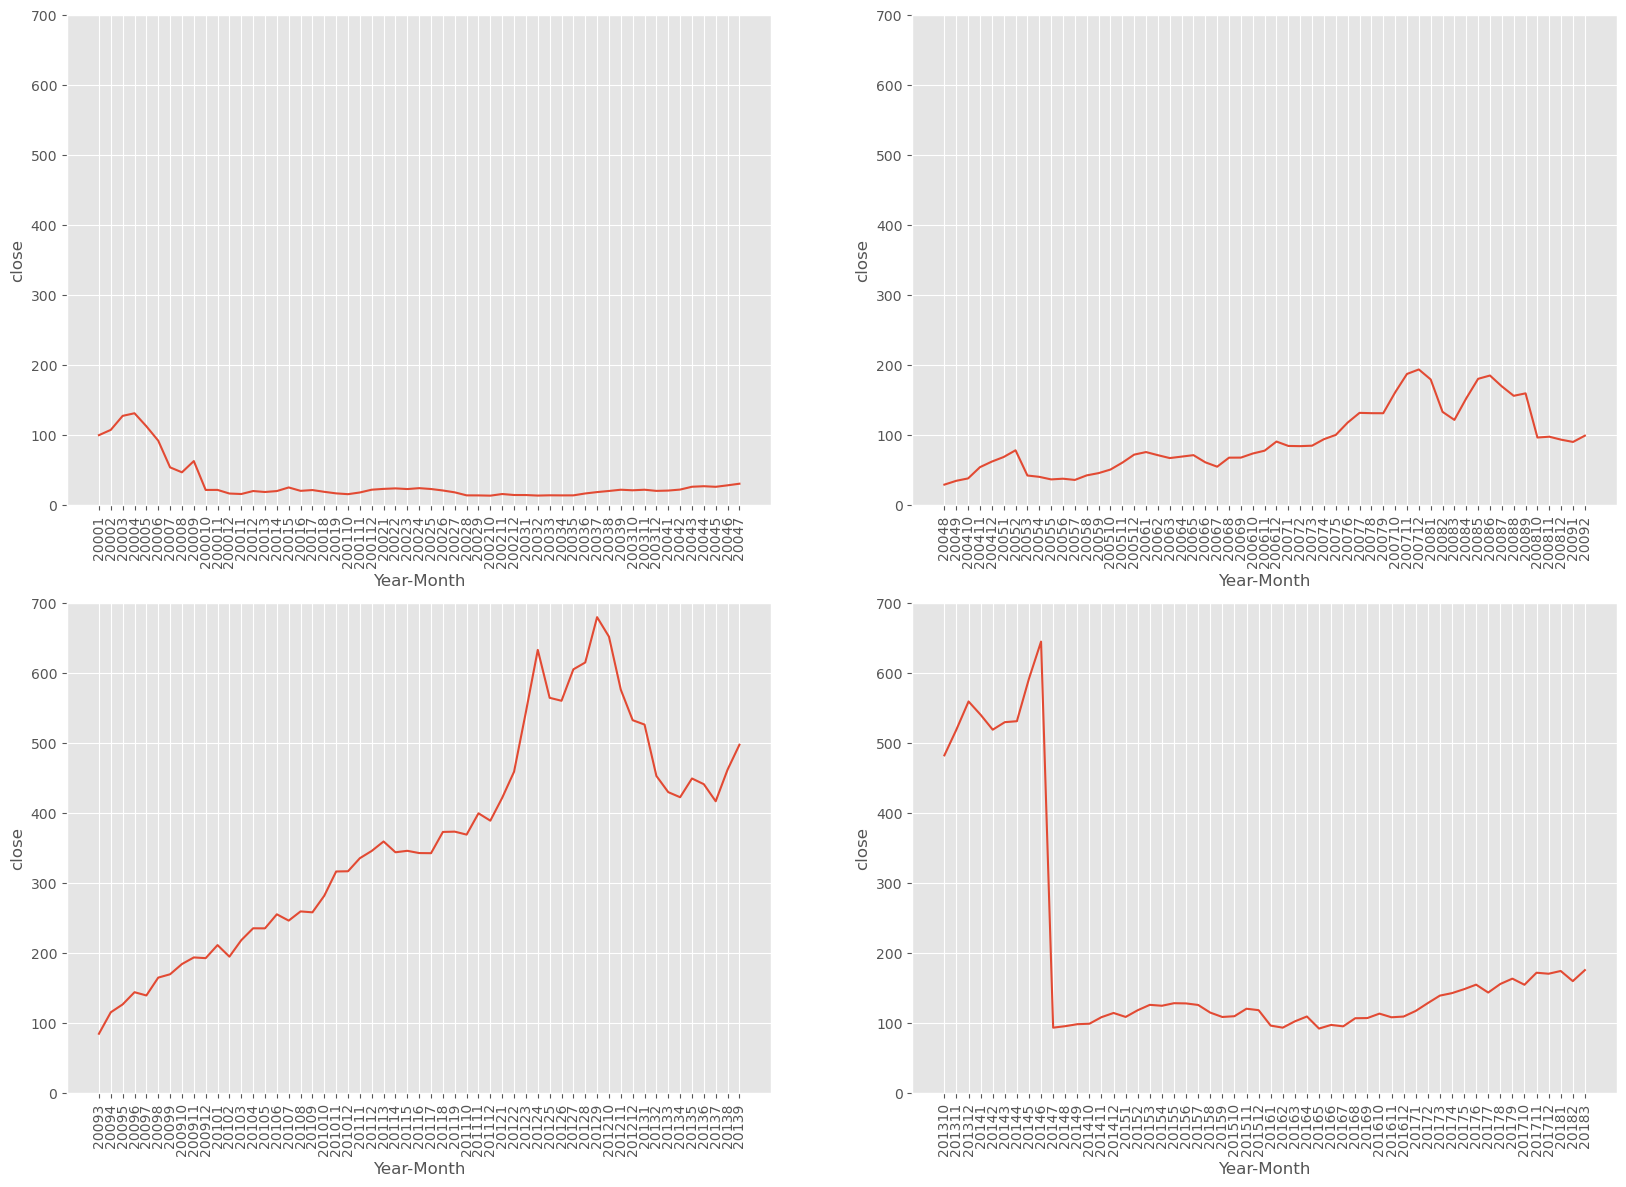

In [42]:
get_scatterplot(stock_agg,"close",[0,700])

- Iphone 3gs and macbook pro came out around May-June 2009 when the stock price rose meteorically.
- In June 2014 there was split in apple stock in ratio of 1:7 so each share was divided into 7 shares of equal value.

### Split Adjusted Stock Price

##### Stock price upto June 2014 needs to be divided by 7 in order to determine the split adjusted price and bring all values to same scale.

In [43]:
index = stock_agg.index[(stock_agg.year == 2014) & (stock_agg.month == 6)].to_list()[0]

In [44]:
split_adjusted_data = stock_agg.loc[0:index,'close']/7
split_adjusted_data = pd.concat([split_adjusted_data, stock_agg.loc[index+1:len(stock_agg), 'close']])

In [45]:
stock_agg['close'] = split_adjusted_data

In [46]:
stock_agg[(stock_agg.year<=2014)].tail(10)

,year,month,close,volume,yrmo
170,2014,3,75.777143,39435800,20143
171,2014,4,75.974286,35265900,20144
172,2014,5,84.654286,67823800,20145
173,2014,6,92.224286,58974500,20146
174,2014,7,94.030000,139168800,20147
175,2014,8,96.130000,236825000,20148
176,2014,9,98.970000,322672500,20149
177,2014,10,99.620000,247749150,201410
178,2014,11,109.010000,199952812,201411
179,2014,12,115.000000,266701088,201412


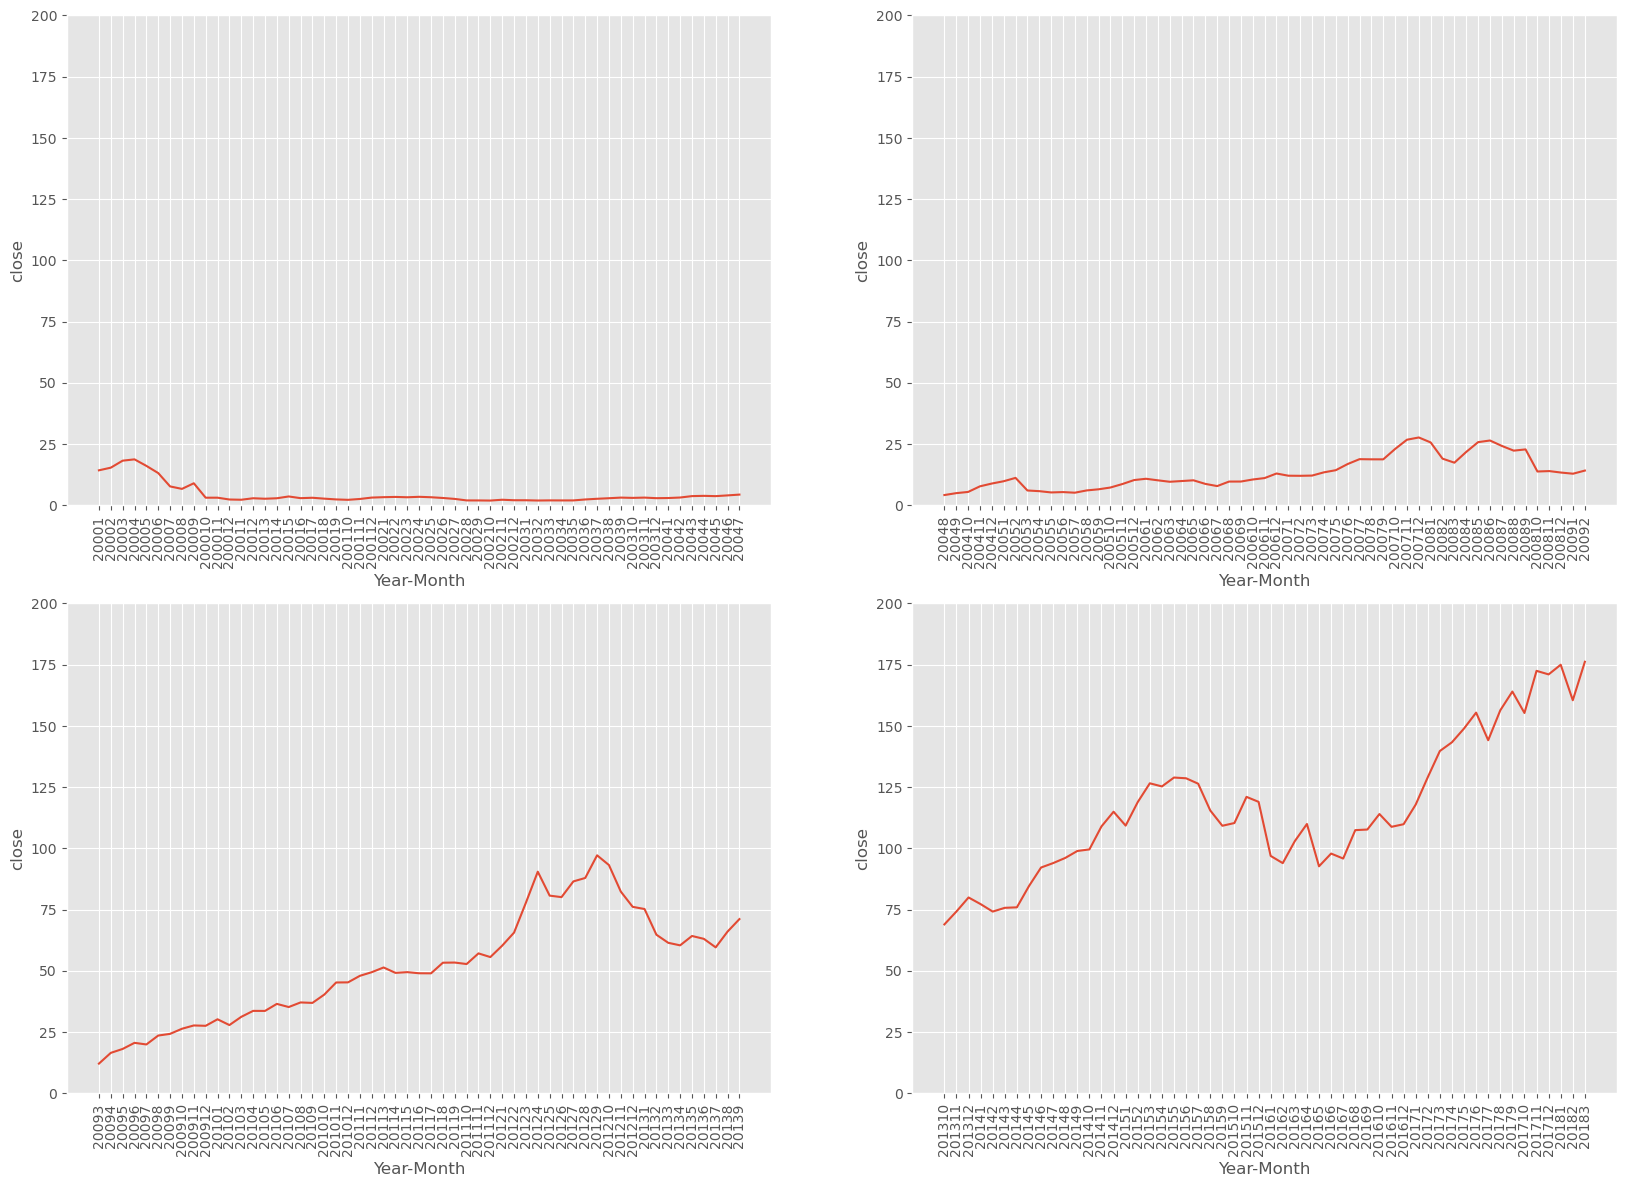

In [47]:
get_scatterplot(stock_agg,"close", [0,200])

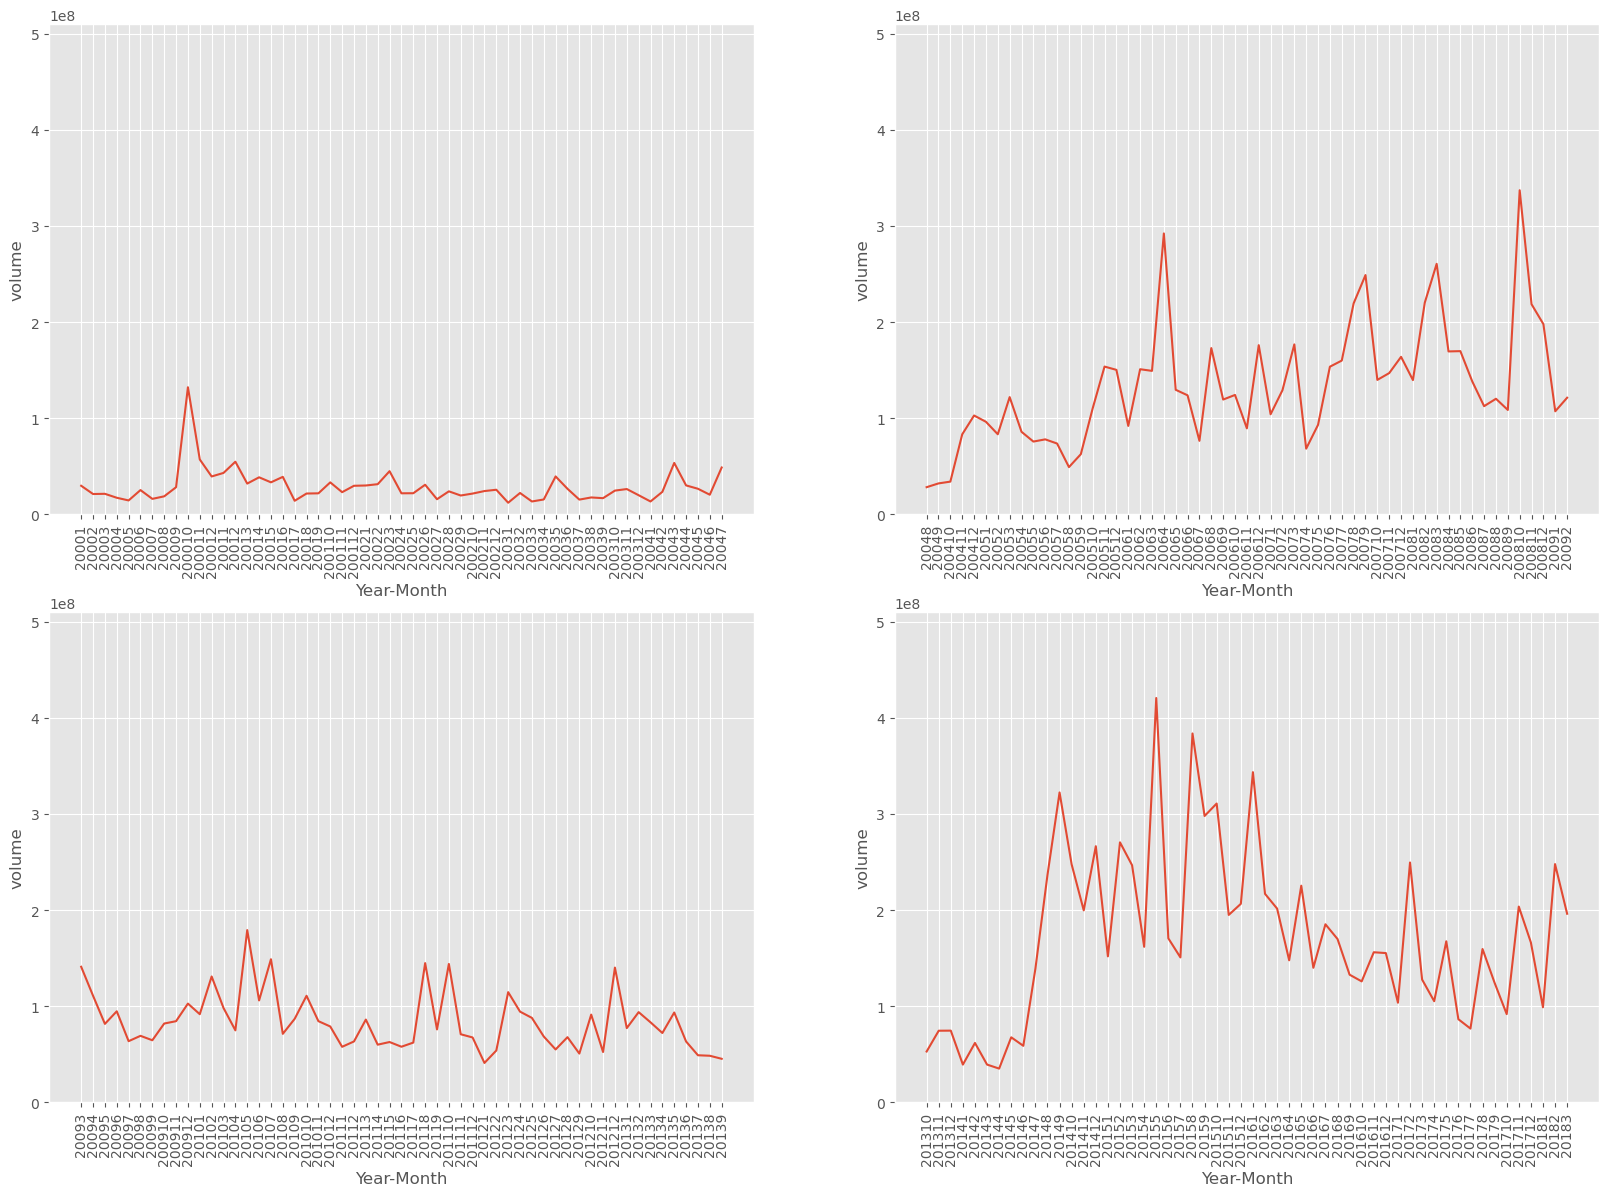

In [48]:
get_scatterplot(stock_agg,"volume",[0,510000000])

### Split Adjusted Volume

In [49]:
split_adjusted_volume = stock_agg.loc[0:index,'volume']*7
split_adjusted_volume = pd.concat([split_adjusted_volume,stock_agg.loc[index+1:len(stock_agg),'volume']])

In [50]:
stock_agg['volume'] = split_adjusted_volume

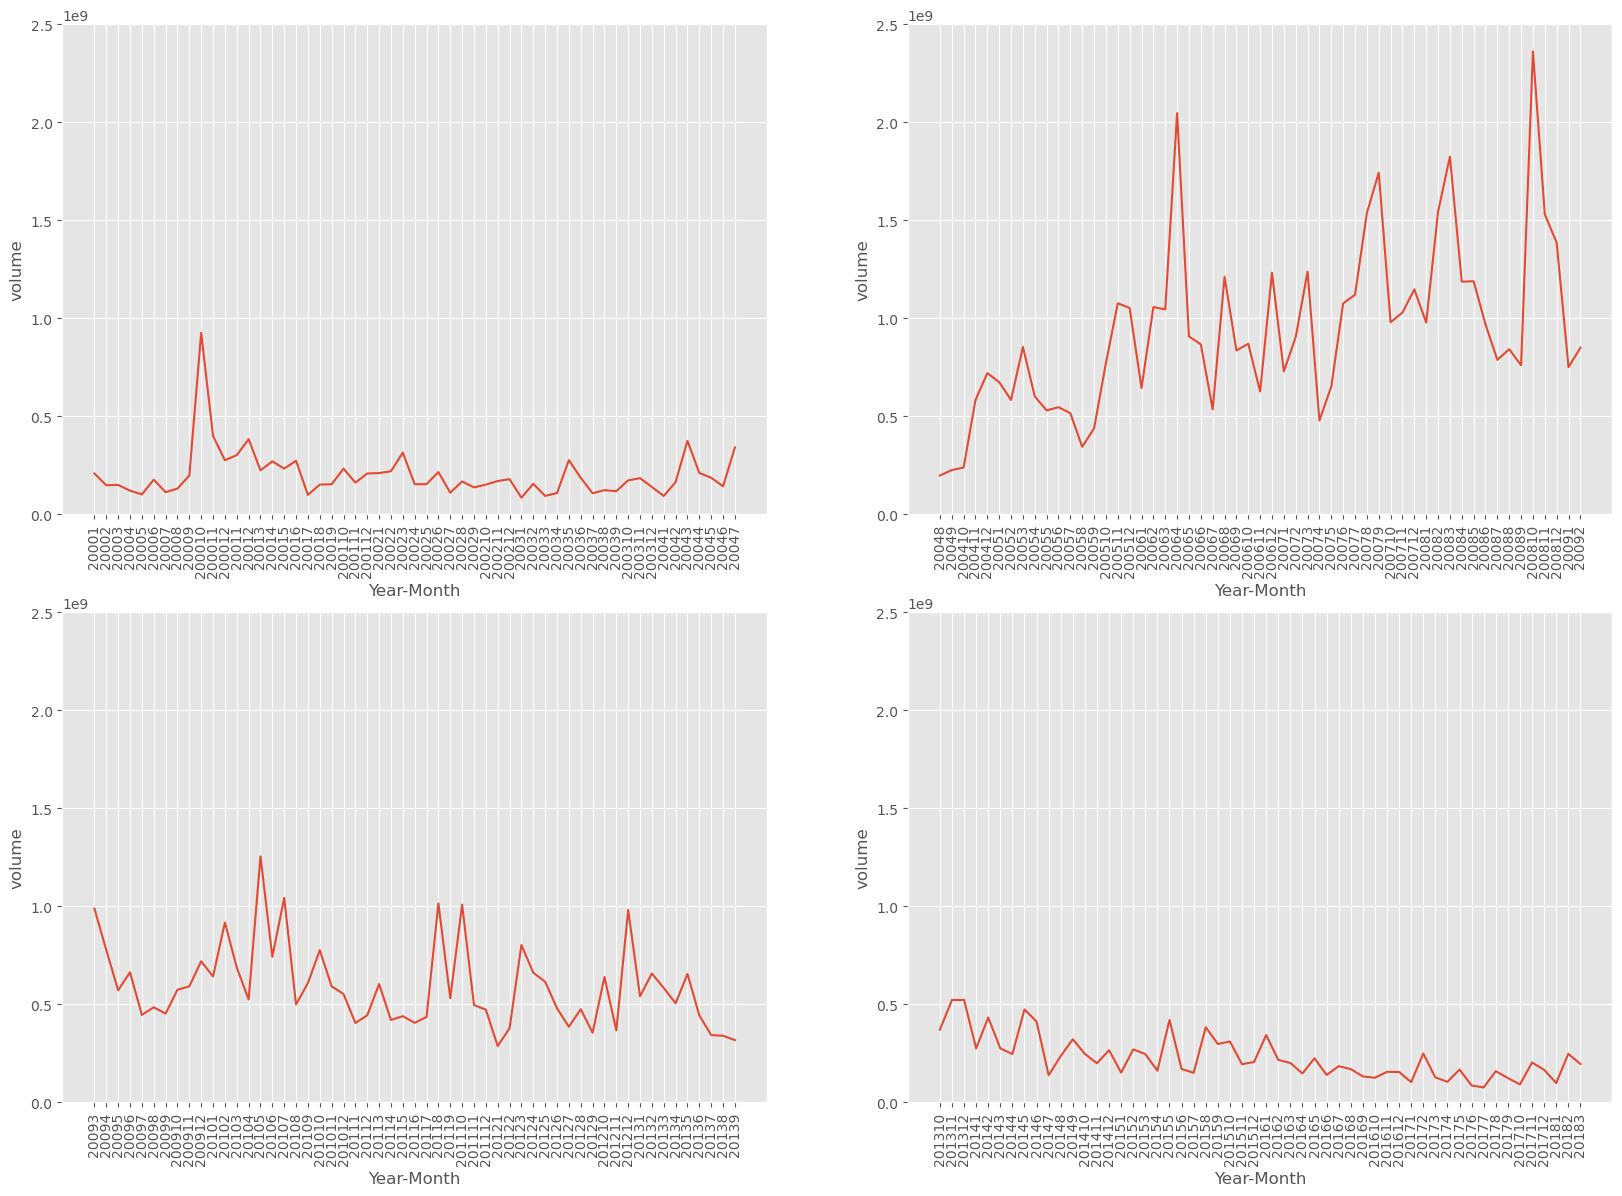

In [51]:
get_scatterplot(stock_agg, 'volume', [0,2500000000])

- If we see **2008 October** there is a large surge in volume which corresponds to a huge sell off of apple stock and corresponding fall in the price. This implies a negative correlation between volume and closing price. Let's confirm this with the correlation heatmap.

## Correlation Heatmap

In [52]:
corr = stock_agg[["close","volume"]].corr()

<Axes: >

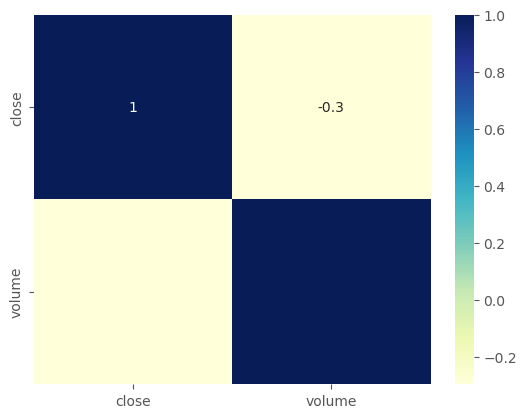

In [53]:
sbn.heatmap(corr, annot=True, cmap="YlGnBu")

## Lags, Moving Average and RSI based Features

- Moving average is the average price of the stock over past n time periods. It indicates movement of the stock and smoothens the price changes.


- RSI or relative strength indicator is the indicator of the fact that whether the stock is oversold or overbought.


- If the RSI is near 0 that means that the stock is over sold and is likely to rebound from its recent lows.


- if the RSI is near 100 it means that the stock is over bought and is likely to reverse to a downward trajectory.

In [54]:
for i in range(1,7):
    stock_agg['close_lag' + str(i)] = stock_agg['close'].shift(i)

In [55]:
stock_agg.head()

,year,month,close,volume,yrmo,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6
0,2000,1,14.348571,209108900,20001,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,15.428571,149026500,20002,14.348571,NaN,NaN,NaN,NaN,NaN
2,2000,3,18.285714,150557400,20003,15.428571,14.348571,NaN,NaN,NaN,NaN
3,2000,4,18.821429,121788800,20004,18.285714,15.428571,14.348571,NaN,NaN,NaN
4,2000,5,16.160000,102251100,20005,18.821429,18.285714,15.428571,14.348571,NaN,NaN


In [56]:
import talib

Formula for RS = average gain over n periods/average loss over n periods

RSI = 100 - (100/(1 + RS))

In [57]:
for n in [3,6,9,12]:

    # Create the moving average and divide by the close price to average it out
    stock_agg['ma_' + str(n)] = talib.SMA(stock_agg['close'].values,
                              timeperiod = n) / stock_agg['close']
    # Create the RSI indicator
    stock_agg['rsi_' + str(n)] = talib.RSI(stock_agg['close'].values, timeperiod=n)
stock_agg.head(10)

,year,month,close,volume,yrmo,close_lag1,close_lag2,close_lag3,close_lag4,close_lag5,close_lag6,ma_3,rsi_3,ma_6,rsi_6,ma_9,rsi_9,ma_12,rsi_12
0,2000,1,14.348571,209108900,20001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,2,15.428571,149026500,20002,14.348571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,3,18.285714,150557400,20003,15.428571,14.348571,NaN,NaN,NaN,NaN,0.876146,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,4,18.821429,121788800,20004,18.285714,15.428571,14.348571,NaN,NaN,NaN,0.930424,100.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,5,16.160000,102251100,20005,18.821429,18.285714,15.428571,14.348571,NaN,NaN,1.098745,52.839423,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,6,13.222857,177703400,20006,16.160000,18.821429,18.285714,15.428571,14.348571,NaN,1.215176,29.673506,1.213393,NaN,NaN,NaN,NaN,NaN
6,2000,7,7.777143,113649200,20007,13.222857,16.160000,18.821429,18.285714,15.428571,14.348571,1.592701,13.370628,1.922208,28.825262,NaN,NaN,NaN,NaN
7,2000,8,6.768571,132244700,20008,7.777143,13.222857,16.160000,18.821429,18.285714,15.428571,1.367525,11.600109,1.995392,26.739658,NaN,NaN,NaN,NaN
8,2000,9,9.062857,198487100,20009,6.768571,7.777143,13.222857,16.160000,18.821429,18.285714,0.868327,39.111656,1.320644,38.822580,1.469683,NaN,NaN,NaN
9,2000,10,3.170000,926824500,200010,9.062857,6.768571,7.777143,13.222857,16.160000,18.821429,1.998047,17.785803,2.952756,25.738445,3.809924,27.383086,NaN,NaN


<Axes: >

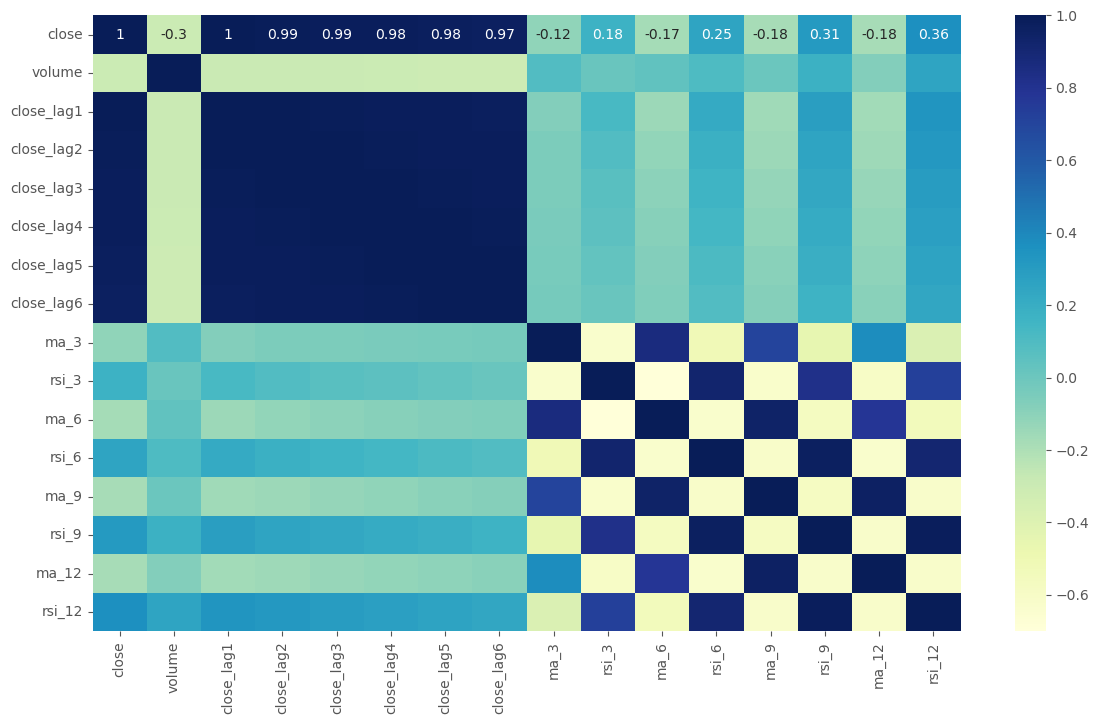

In [58]:
plt.figure(figsize=(14,8))
corr = stock_agg.drop(columns=["year","month","yrmo"]).corr()
sbn.heatmap(data=corr, annot=True, cmap="YlGnBu")